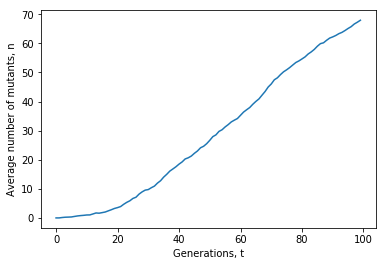

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
r = 1
c = 1

def binomial_rnd(N, p, r, c):
    # BINRAND Create random numbers from binomial distribution
    # N = the number of trial, p = probability of success per trial, r = the number of rows of the output 
    # c = the number of columns of the output
    # if r and c are unspecified, they will be set = 1
    '''   
    if (nargin < 2):
        print('Not enough input arguments, it needs at least three.')
    elif (nargin > 4):
        print('Too many input arguments, it needs at most five.')
    elif (nargin == 3):
        c = 1
    elif (nargin == 2):
        r = 1
        c = 1
    '''     
    M = np.zeros((r,c))
    for c1 in range(0,N):
        M1 = np.zeros((r,c))
        y = np.random.random((r,c))
        i1 = np.where( y < p)
        if (len(i1) != 0):
            M1[i1] = 1
        M = M + M1
    return M;


def multisim(P, s, u, v, NoCopies, T):
    n = np.zeros((NoCopies,1))
    average = np.zeros((T+1,1))
    for t in range(0,T):
        # plot distribution
        average[t+1] = np.mean(n);
        '''
        if (t>0):
            plot(x,h,'red')
        counts, bins, x = plt.hist(n,range(0,P),label='hst');
        #print()
        h = counts
        x = np.mean(bins)
        h = h/NoCopies;
        plt.plot(x,h)
        plt.xlabel('Number of mutants, n')
        plt.ylabel('P(n)')
        #str = strcat('t= ', num2str(t));
        plt.title('t=%s' %t)
        plt.show()
        '''
        # selection
        p_s = (1+s)*n/(P+s*n);
        # mutations
        p_sm = (1-v)*p_s + u*(1.0-p_s);
        # sampling
        t = t + 1;
        for i in range(1,NoCopies):
            n[i] = binomial_rnd(P, p_sm[i],r,c);

  # plot average
    plt.plot(range(0,T), average[range(0,T)])
    plt.xlabel('Generations, t')
    plt.ylabel('Average number of mutants, n')
    plt.show()
    
multisim(100, 0.1, 0.001, 0.001, 100, 100);

In [72]:
import math
def transition_matrix(P, s, u, v):
    W = np.zeros((P,P));
    for n in range(0,P):
        p_sm = ((1-v)*(1+s)*n + u*(P-n))/(P+s*n);
        lp = math.log(p_sm);
        lq = math.log(1.0-p_sm);
        x = P*lq;   
        for nP in range(0,P):
            W[nP,n] = math.exp(x);
            x = x + lp - lq + math.log((P-nP)/(nP+1))
    return W

W = transition_matrix(10,0.1,0.001, 0.001)
sum(W)

array([1.        , 1.        , 0.99999978, 0.99998848, 0.9998156 ,
       0.9984464 , 0.99127693, 0.96298159, 0.87199352, 0.62139971])

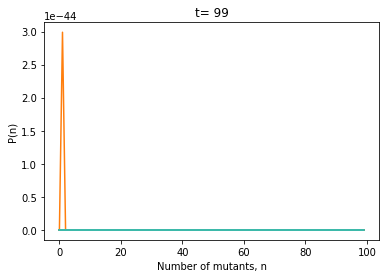

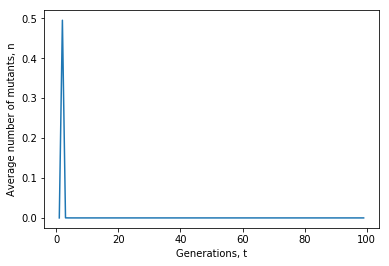

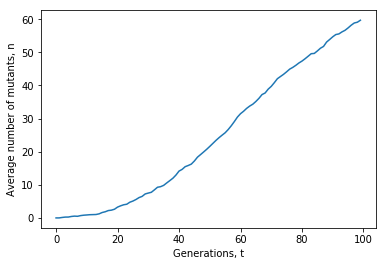

In [75]:
def markov(P, s, u, v, T):
    average = np.zeros((T,1))
    p = np.zeros((P,1));
    p[1] = 1;
    # initialise probability distribution
    W = transition_matrix(P, s, u, v);
    x = range(0,P);
    plt.figure(1)
    plt.plot(x,p);   
    for t in range(1,T):
        plt.plot(x,p,'red');
        average[t] = np.mean(x*p);
        p = W*p;
        plt.plot(x,p);
        plt.xlabel('Number of mutants, n');
        plt.ylabel('P(n)');
        #str = strcat('t= ', num2str(t));
        plt.title('t= %d' %t);
    plt.show()
    plt.figure(2)    
    plt.plot(range(1,T), average[range(0,T-1)])
    plt.xlabel('Generations, t')
    plt.ylabel('Average number of mutants, n')
    plt.show()
markov(100, 0.1, 0.001, 0.001, 100)
multisim(100, 0.1, 0.001, 0.001, 100, 100);